In [1]:
import pandas as pd

In [2]:
df5=pd.read_csv("2015.csv")
df6=pd.read_csv("2016.csv")
df7=pd.read_csv("2017.csv")
df8=pd.read_csv("2018.csv")
df9=pd.read_csv("2019.csv")

In [3]:
df5[(df5['Health (Life Expectancy)']>=0.5)&(df5['Health (Life Expectancy)']<=1)]
df5["Country"]

0      Switzerland
1          Iceland
2          Denmark
3           Norway
4           Canada
          ...     
153         Rwanda
154          Benin
155          Syria
156        Burundi
157           Togo
Name: Country, Length: 158, dtype: object

In [4]:
#Top=df6["Happiness Score"].nlargest(10)
df6["Country"].head(10)

0        Denmark
1    Switzerland
2        Iceland
3         Norway
4        Finland
5         Canada
6    Netherlands
7    New Zealand
8      Australia
9         Sweden
Name: Country, dtype: object

In [5]:
df6.groupby("Region")["Happiness Score"].mean()

Region
Australia and New Zealand          7.323500
Central and Eastern Europe         5.370690
Eastern Asia                       5.624167
Latin America and Caribbean        6.101750
Middle East and Northern Africa    5.386053
North America                      7.254000
Southeastern Asia                  5.338889
Southern Asia                      4.563286
Sub-Saharan Africa                 4.136421
Western Europe                     6.685667
Name: Happiness Score, dtype: float64

In [6]:
#https://www.youtube.com/watch?v=rzR_cKnkD18
import numpy as np

In [7]:
Q1_5=np.percentile(df5["Happiness Score"],25)
Q3_5=np.percentile(df5["Happiness Score"],75)
Q1_6=np.percentile(df6["Happiness Score"],25)
Q3_6=np.percentile(df6["Happiness Score"],75)
Q1_7=np.percentile(df7["Happiness.Score"],25)
Q3_7=np.percentile(df7["Happiness.Score"],75)
Q1_8=np.percentile(df8["Score"],25)
Q3_8=np.percentile(df8["Score"],75)
Q1_9=np.percentile(df9["Score"],25)
Q3_9=np.percentile(df9["Score"],75)

In [8]:
IQR_5=Q3_5-Q1_5
IQR_6=Q3_6-Q1_6
IQR_7=Q3_7-Q1_7
IQR_8=Q3_8-Q1_8
IQR_9=Q3_9-Q1_9

In [9]:
lower_5=Q1_5-(1.5*IQR_5)
upper_5=Q3_5+(1.5*IQR_5)
lower_6=Q1_6-(1.5*IQR_6)
upper_6=Q3_6+(1.5*IQR_6)
lower_7=Q1_7-(1.5*IQR_7)
upper_7=Q3_7+(1.5*IQR_7)
lower_8=Q1_8-(1.5*IQR_8)
upper_8=Q3_8+(1.5*IQR_8)
lower_9=Q1_9-(1.5*IQR_9)
upper_9=Q3_9+(1.5*IQR_9)

In [10]:
for i in range(157):
    condition = (df5["Happiness Score"] < lower_5) & (df5["Happiness Score"] > upper_5)
    if condition.iloc[i]:
         print(df5.iloc[i])
print("Outliers ended in the give data set")

Outliers ended in the give data set


In [11]:
for i in range(157):
    condition = (df6["Happiness Score"] < lower_6) & (df6["Happiness Score"] > upper_6)
    if condition.iloc[i]:
         print(df6.iloc[i])
print("Outliers ended in the give data set")

Outliers ended in the give data set


In [12]:
for i in range(155):
    condition = (df7["Happiness.Score"] < lower_7) & (df7["Happiness.Score"] > upper_7)
    if condition.iloc[i]:
         print(df7.iloc[i])
print("Outliers ended in the give data set")

Outliers ended in the give data set


In [13]:
for i in range(156):
    condition = (df8["Score"] < lower_8) & (df8["Score"] > upper_8)
    if condition.iloc[i]:
         print(df8.iloc[i])
print("Outliers ended in the give data set")

Outliers ended in the give data set


In [14]:
for i in range(156):
    condition = (df9["Score"] < lower_9) & (df9["Score"] > upper_9)
    if condition.iloc[i]:
         print(df9.iloc[i])
print("Outliers ended in the give data set")

Outliers ended in the give data set


In [15]:
#df_merge = pd.merge(df5, df6, on='Happiness Score')
#df_merge.rename(columns={'Happiness Score': 'Happiness.Score'}, inplace=True)
#df_merge = pd.merge(df_merge, df7, on='Happiness.Score')
#df_merge.rename(columns={'Happiness.Score': 'Score'}, inplace=True)
#df_merge = pd.merge(df_merge, df8, on='Score')
#df_merge = pd.merge(df_merge, df9, on='Score')
#df_merge
df_merge= pd.DataFrame()  
df_merge['Country'] = df5['Country']
df_merge['2015'] = df5['Happiness Score']
df_merge['2016'] = df6['Happiness Score']
df_merge['2017'] = df7['Happiness.Score']
df_merge['2018'] = df8['Score']
df_merge['2019'] = df8['Score']
df_merge

,Country,2015,2016,2017,2018,2019
0,Switzerland,7.587,7.526,7.537,7.632,7.632
1,Iceland,7.561,7.509,7.522,7.594,7.594
2,Denmark,7.527,7.501,7.504,7.555,7.555
3,Norway,7.522,7.498,7.494,7.495,7.495
4,Canada,7.427,7.413,7.469,7.487,7.487
...,...,...,...,...,...,...
153,Rwanda,3.465,3.360,2.905,3.254,3.254
154,Benin,3.340,3.303,2.693,3.083,3.083
155,Syria,3.006,3.069,NaN,2.905,2.905
156,Burundi,2.905,2.905,NaN,NaN,NaN


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

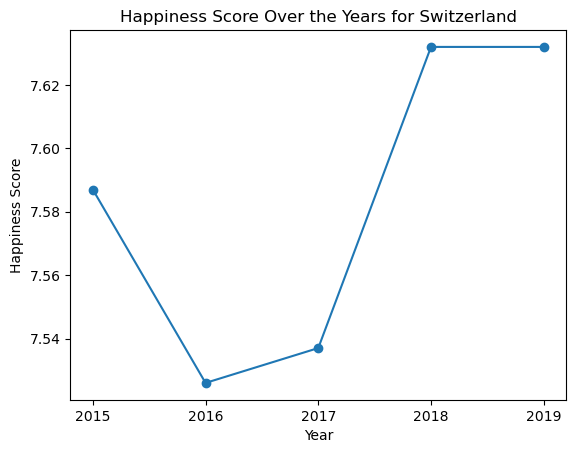

In [17]:
# Filter the data for Switzerland
switzerland_data = df_merge[df_merge['Country'] == 'Switzerland']
# Extract the years and Happiness Scores
years = ['2015', '2016', '2017', '2018', '2019']
happiness_scores = switzerland_data[years].values[0]
# Create the line chart
plt.plot(years, happiness_scores, marker='o')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Happiness Score Over the Years for Switzerland')
plt.show()

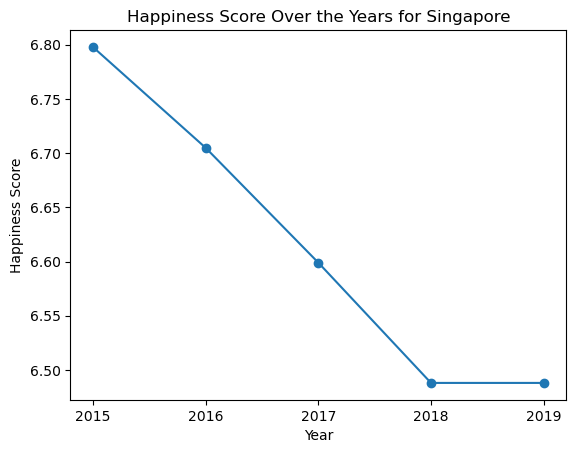

In [18]:
# Filter the data for Switzerland
switzerland_data = df_merge[df_merge['Country'] == 'Singapore']
# Extract the years and Happiness Scores
years = ['2015', '2016', '2017', '2018', '2019']
happiness_scores = switzerland_data[years].values[0]
# Create the line chart
plt.plot(years, happiness_scores, marker='o')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Happiness Score Over the Years for Singapore')
plt.show()

##### print((df9["Score"]<lower_9)&(df9["Score"]>upper_9))

In [19]:
correlation = df5['Happiness Score'].corr(df5['Economy (GDP per Capita)'])
correlation

0.7809655268660212

In [20]:
Eco= df5.groupby("Region")["Economy (GDP per Capita)"].max() < 0.5
Eco

Region
Australia and New Zealand          False
Central and Eastern Europe         False
Eastern Asia                       False
Latin America and Caribbean        False
Middle East and Northern Africa    False
North America                      False
Southeastern Asia                  False
Southern Asia                      False
Sub-Saharan Africa                 False
Western Europe                     False
Name: Economy (GDP per Capita), dtype: bool

In [21]:
df5.corr()

C:\Temp\ipykernel_15884\2952672672.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df5.corr()


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [22]:
#Health (Life Expectancy) and Economy (GDP per Capita) have the highest correlation amoung them as they are having the maximum value in the correlation table 

In [23]:
df6.corr()

C:\Temp\ipykernel_15884\2505764688.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df6.corr()


,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.995743,-0.994928,-0.995525,-0.793577,-0.733276,-0.767991,-0.557169,-0.387102,-0.145369,-0.542616
Happiness Score,-0.995743,1.000000,0.999485,0.999474,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738
Lower Confidence Interval,-0.994928,0.999485,1.000000,0.997919,0.790673,0.741523,0.769177,0.566857,0.404840,0.158025,0.538793
Upper Confidence Interval,-0.995525,0.999474,0.997919,1.000000,0.789140,0.736184,0.760752,0.566203,0.398775,0.155495,0.548164
Economy (GDP per Capita),-0.793577,0.790322,0.790673,0.789140,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family,-0.733276,0.739252,0.741523,0.736184,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health (Life Expectancy),-0.767991,0.765384,0.769177,0.760752,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,-0.557169,0.566827,0.566857,0.566203,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust (Government Corruption),-0.387102,0.402032,0.404840,0.398775,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,-0.145369,0.156848,0.158025,0.155495,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001


In [24]:
#Lower Confidence Interval and Happiness Score have the highest correlation amoung them as they are having the maximum value in the correlation table 

In [25]:
#QUESTION 2

In [26]:
dfQ2=pd.read_csv("earth_surface_temperatures.csv")
dfQ2

,Years,Month,Country,Temperature,Monthly_variation,Anomaly
0,1848,5,Afghanistan,19.573,-0.297,2.037
1,1848,6,Afghanistan,23.894,-0.796,2.136
2,1848,7,Afghanistan,26.507,-0.113,1.937
3,1848,8,Afghanistan,24.498,-0.462,1.937
4,1848,9,Afghanistan,19.068,-1.272,1.865
...,...,...,...,...,...,...
534566,2020,8,Zimbabwe,19.621,1.401,0.466
534567,2020,9,Zimbabwe,22.638,1.008,0.246
534568,2020,10,Zimbabwe,24.588,0.458,0.294
534569,2020,11,Zimbabwe,25.934,1.724,1.035


In [27]:
dfQ2.describe

<bound method NDFrame.describe of         Years  Month      Country  Temperature  Monthly_variation  Anomaly
0        1848      5  Afghanistan       19.573             -0.297    2.037
1        1848      6  Afghanistan       23.894             -0.796    2.136
2        1848      7  Afghanistan       26.507             -0.113    1.937
3        1848      8  Afghanistan       24.498             -0.462    1.937
4        1848      9  Afghanistan       19.068             -1.272    1.865
...       ...    ...          ...          ...                ...      ...
534566   2020      8     Zimbabwe       19.621              1.401    0.466
534567   2020      9     Zimbabwe       22.638              1.008    0.246
534568   2020     10     Zimbabwe       24.588              0.458    0.294
534569   2020     11     Zimbabwe       25.934              1.724    1.035
534570   2020     12     Zimbabwe       23.595             -0.025    0.574

[534571 rows x 6 columns]>

In [28]:
dfQ2['Temperature'] = dfQ2['Temperature'].fillna(0).astype(int)
dfQ2.describe

<bound method NDFrame.describe of         Years  Month      Country  Temperature  Monthly_variation  Anomaly
0        1848      5  Afghanistan           19             -0.297    2.037
1        1848      6  Afghanistan           23             -0.796    2.136
2        1848      7  Afghanistan           26             -0.113    1.937
3        1848      8  Afghanistan           24             -0.462    1.937
4        1848      9  Afghanistan           19             -1.272    1.865
...       ...    ...          ...          ...                ...      ...
534566   2020      8     Zimbabwe           19              1.401    0.466
534567   2020      9     Zimbabwe           22              1.008    0.246
534568   2020     10     Zimbabwe           24              0.458    0.294
534569   2020     11     Zimbabwe           25              1.724    1.035
534570   2020     12     Zimbabwe           23             -0.025    0.574

[534571 rows x 6 columns]>

In [29]:
dfQ2.isnull()

,Years,Month,Country,Temperature,Monthly_variation,Anomaly
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
534566,False,False,False,False,False,False
534567,False,False,False,False,False,False
534568,False,False,False,False,False,False
534569,False,False,False,False,False,False


In [30]:
average_value = dfQ2['Temperature'].mean()
dfQ2['Temperature'] = dfQ2['Temperature'].replace(0, average_value)
dfQ2

,Years,Month,Country,Temperature,Monthly_variation,Anomaly
0,1848,5,Afghanistan,19.0,-0.297,2.037
1,1848,6,Afghanistan,23.0,-0.796,2.136
2,1848,7,Afghanistan,26.0,-0.113,1.937
3,1848,8,Afghanistan,24.0,-0.462,1.937
4,1848,9,Afghanistan,19.0,-1.272,1.865
...,...,...,...,...,...,...
534566,2020,8,Zimbabwe,19.0,1.401,0.466
534567,2020,9,Zimbabwe,22.0,1.008,0.246
534568,2020,10,Zimbabwe,24.0,0.458,0.294
534569,2020,11,Zimbabwe,25.0,1.724,1.035


In [31]:
dfQ2['Date'] = (dfQ2['Month'].astype(str) + '-' + dfQ2['Years'].astype(str))
dfQ2

,Years,Month,Country,Temperature,Monthly_variation,Anomaly,Date
0,1848,5,Afghanistan,19.0,-0.297,2.037,5-1848
1,1848,6,Afghanistan,23.0,-0.796,2.136,6-1848
2,1848,7,Afghanistan,26.0,-0.113,1.937,7-1848
3,1848,8,Afghanistan,24.0,-0.462,1.937,8-1848
4,1848,9,Afghanistan,19.0,-1.272,1.865,9-1848
...,...,...,...,...,...,...,...
534566,2020,8,Zimbabwe,19.0,1.401,0.466,8-2020
534567,2020,9,Zimbabwe,22.0,1.008,0.246,9-2020
534568,2020,10,Zimbabwe,24.0,0.458,0.294,10-2020
534569,2020,11,Zimbabwe,25.0,1.724,1.035,11-2020


In [32]:
Q1_Q2=np.percentile(dfQ2["Temperature"],25)
Q3_Q2=np.percentile(dfQ2["Temperature"],75)

In [33]:
IQR_Q2=Q3_Q2-Q1_Q2

In [34]:
lower_Q2=Q1_Q2-(1.5*IQR_Q2)
upper_Q2=Q3_Q2+(1.5*IQR_Q2)

In [35]:
def process_rows(df, lower, upper, index=0):
    if index < len(df):
        condition = (df["Temperature"] < lower) & (df["Temperature"] > upper)
        if condition.iloc[index]:
            print(df.iloc[index])
        process_rows(df, lower, upper, index + 1)
print("Outliers ended in the give data set")

Outliers ended in the give data set


In [36]:
dfQ2.groupby("Country")["Temperature"].mean()

Country
Afghanistan       14.494669
Albania           12.478990
Algeria           21.418813
American Samoa    25.313905
Andorra           10.735602
                    ...    
Virgin Islands    24.782509
Western Sahara    22.731064
Yemen             25.674210
Zambia            20.855038
Zimbabwe          20.688015
Name: Temperature, Length: 233, dtype: float64

In [37]:
dfQ2['Date'] = pd.to_datetime(dfQ2['Date'], format='%m-%Y')
temp = dfQ2.groupby(dfQ2['Date'].dt.year)['Temperature'].mean()
temp

Date
1743    15.840777
1744    11.480744
1745    11.923879
1746    15.840777
1747    15.840777
          ...    
2016    19.461325
2017    19.322276
2018    19.417694
2019    19.483252
2020    19.526297
Name: Temperature, Length: 278, dtype: float64

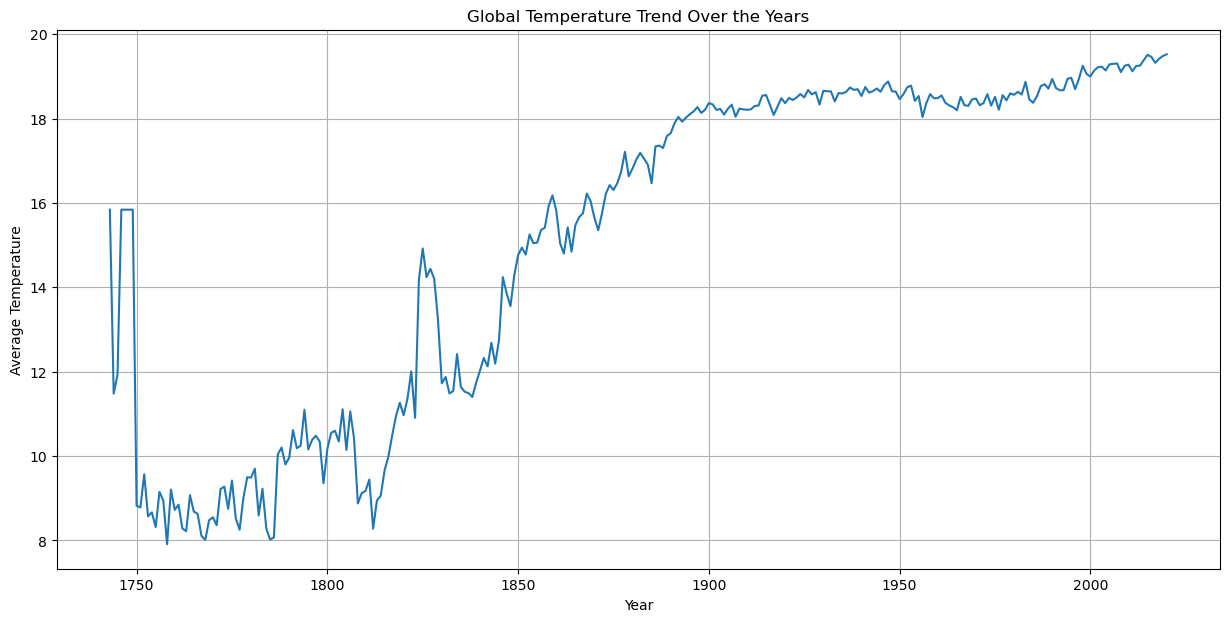

In [38]:
plt.figure(figsize=(15, 7))
plt.plot(temp.index, temp.values, linestyle='-')
plt.title('Global Temperature Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()

In [39]:
maxval=dfQ2.groupby("Country")["Temperature","Month"].max()
minval=dfQ2.groupby("Country")["Temperature","Month"].min()
maxval

C:\Temp\ipykernel_15884\229151506.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  maxval=dfQ2.groupby("Country")["Temperature","Month"].max()
C:\Temp\ipykernel_15884\229151506.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  minval=dfQ2.groupby("Country")["Temperature","Month"].min()


,Temperature,Month
Country,,
Afghanistan,28.0,12
Albania,26.0,12
Algeria,36.0,12
American Samoa,29.0,12
Andorra,23.0,12
...,...,...
Virgin Islands,29.0,12
Western Sahara,33.0,12
Yemen,33.0,12


In [40]:
minval

,Temperature,Month
Country,,
Afghanistan,-4.000000,1
Albania,-2.000000,1
Algeria,9.000000,1
American Samoa,15.840777,1
Andorra,-1.000000,1
...,...,...
Virgin Islands,15.840777,1
Western Sahara,14.000000,1
Yemen,15.840777,1


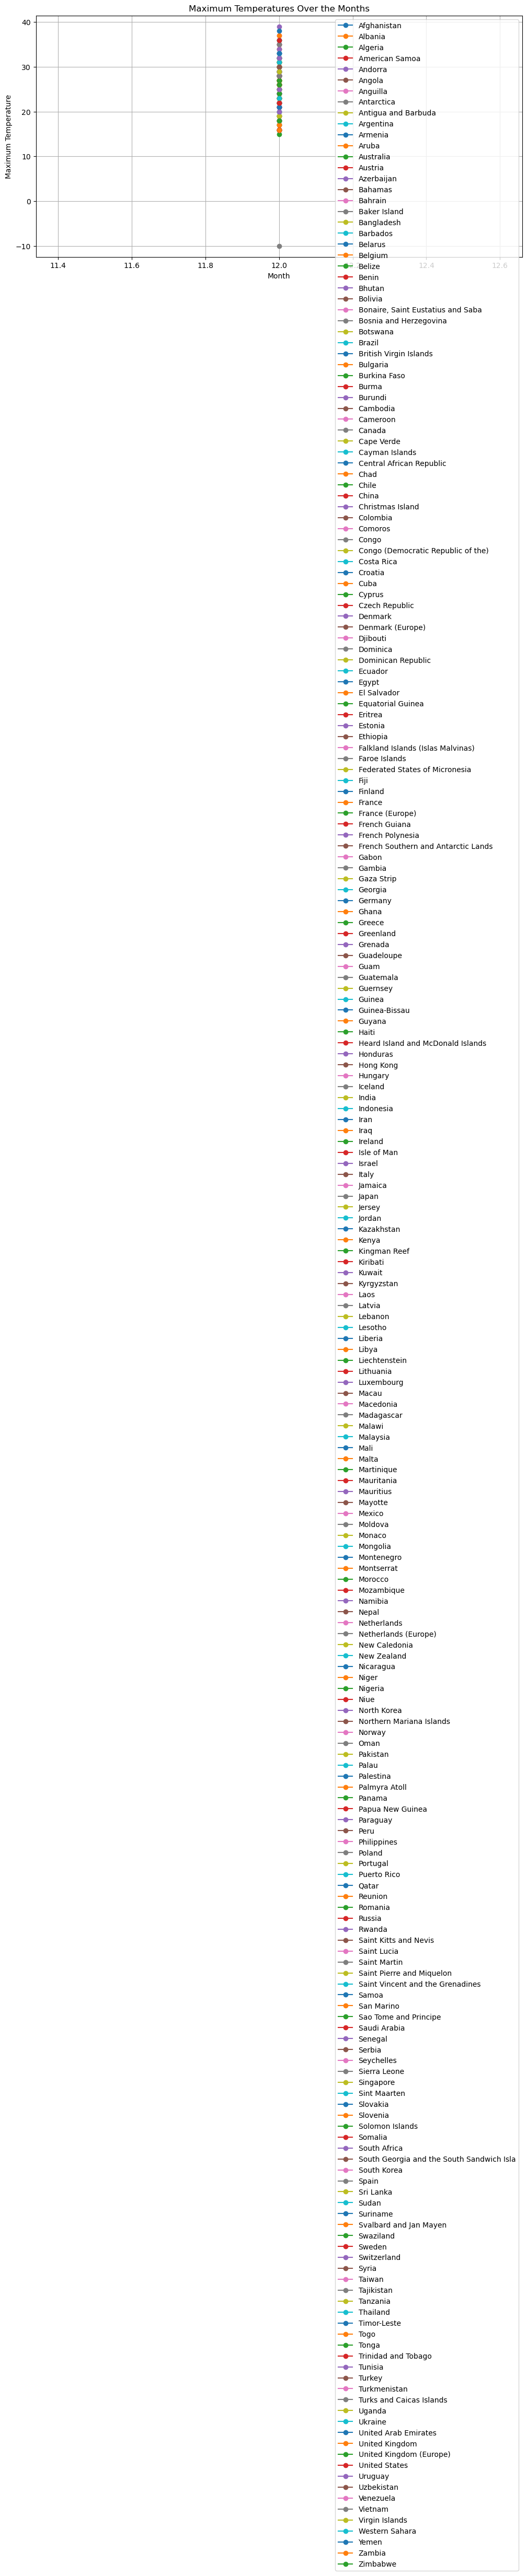

In [41]:
plt.figure(figsize=(12, 6))
for country, data in maxval.iterrows():
    plt.plot(data["Month"], data["Temperature"], label=country, marker='o')

plt.title('Maximum Temperatures Over the Months')
plt.xlabel('Month')
plt.ylabel('Maximum Temperature')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [42]:
temperature= dfQ2["Temperature"].describe()
monthlyVariation = dfQ2["Monthly_variation"].describe()
anomaly= dfQ2["Anomaly"].describe()

In [43]:
temperature

count    534571.000000
mean         16.954640
std          10.463951
min         -40.000000
25%          11.000000
50%          19.000000
75%          25.000000
max          39.000000
Name: Temperature, dtype: float64

In [44]:
monthlyVariation

count    508818.000000
mean         -0.075495
std           1.231296
min         -10.566000
25%          -0.663000
50%          -0.076000
75%           0.552000
max          11.817000
Name: Monthly_variation, dtype: float64

In [45]:
anomaly

count    508818.000000
mean          0.888305
std           1.069699
min           0.037000
25%           0.293000
50%           0.494000
75%           1.004000
max          12.203000
Name: Anomaly, dtype: float64

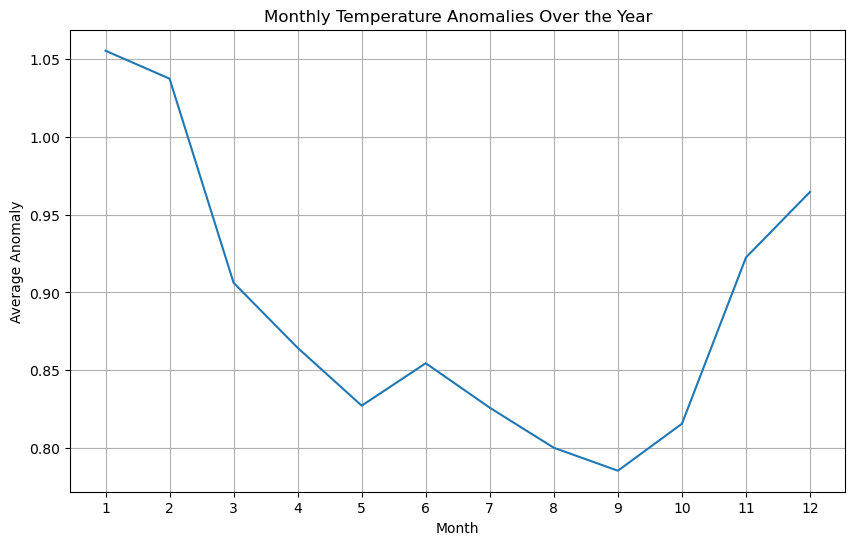

In [46]:
monthly_mean_anomalies = dfQ2.groupby('Month')['Anomaly'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_mean_anomalies.index, monthly_mean_anomalies)
plt.title('Monthly Temperature Anomalies Over the Year')
plt.xlabel('Month')
plt.ylabel('Average Anomaly')
plt.xticks(range(1, 13)) 
plt.grid(True)
plt.show()

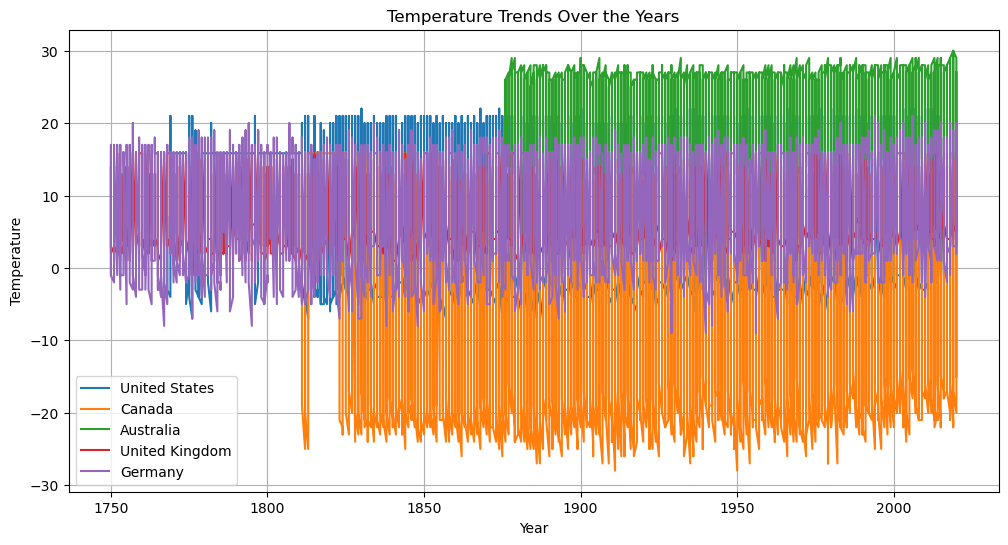

In [47]:
selected_countries = ["United States", "Canada", "Australia", "United Kingdom", "Germany"]
filtered_data = dfQ2[dfQ2['Country'].isin(selected_countries)]
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Years'], country_data['Temperature'], label=country)

plt.title('Temperature Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(dfQ2['Temperature'], dfQ2['Monthly_variation'], alpha=0.5)
plt.title('Temperature vs. Monthly Variation')
plt.xlabel('Temperature')
plt.ylabel('Monthly Variation')
plt.grid(True)
plt.show()

In [ ]:
# Create a scatterplot for Temperature vs. Anomaly
plt.figure(figsize=(8, 6))
plt.scatter(dfQ2['Temperature'], dfQ2['Anomaly'], alpha=0.5)
plt.title('Temperature vs. Anomaly')
plt.xlabel('Temperature')
plt.ylabel('Anomaly')
plt.grid(True)
plt.show()